<a href="https://colab.research.google.com/github/HermesArteaga/Analisis_Exploratorio_con_Python/blob/main/An%C3%A1lisis_Exploratorio_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis Exploratorio**
##### El presente análisis exploratorio de datos se apoya en los datos que podemos encontrar en el siguiente enlace:
https://drive.google.com/file/d/1EjxlDoxFCU1_6CKf3TuIAyMqYQFHDnFY/view?usp=share_link

##### Análisis exploratorio de un dataset de precios de propiedades efectuando una limpieza del dataset provisto. Particularmente, diseñando estrategias para lidiar con los datos perdidos en ciertas variables.

##### Realización de un análisis descriptivo de las principales variables.

##### Creación de nuevas columnas a partir de las características dadas que aportan valor predictivo.


## ***Informacion General del DataSet***

Dataset de la inmobiliaria Properati con información de precios de ventas de inmuebles en Argentina con 121.220 registros de datos
y 26 variables que se resumen como sigue:
#### *Columnas*
- unnamed: 0: Índice del dataset
- Operation: Solo contiene un dato que corresponde a venta "Sell"
- property_type: Indica el tipo de propiedad en 4 categorías, House, Apartment, PH y store
- place_name: Localidad
- place_with_parent_names: Posee en la misma variable el País, la Provincia, localidad
- country_name: Nombre del País, Únicamente Argentina
- state_name: Provincia              
- geonames_id: Identificación en la DB de Geonames
- lat-lon: Latitud, Longitud 
- lat: Latitud
- lon: Longitud 
- price: Precio
- currency: Moneda 
- price_aprox_local_currency: Precio en Moneda Local
- price_aprox_usd: Precio aproximado en USD
- surface_total_in_m2: Área Total M2
- surface_covered_in_m2:  Área Efectiva
- price_usd_per_m2: Precio en USD x M2
- price_per_m2: Precio en M2  
- floor: Piso 
- rooms: Habitaciones
- expenses : Gastos 
- properati_url: URL Inmueble
- description: Descripción de características
- title: Titulo de la publicación


In [1]:
# Se importa las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Se lee el archivo que va a ser utilizado para el análisis
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Precios de Propiedad - Análisis Exploratorio /Inmobiliaria_Properati.csv')

In [3]:
# Se verifica las dimensiones del DataFrame importado
initial_shape = data.shape
initial_shape

(121220, 26)

In [4]:
# Se analiza las Columnas y tipos de datos de las mismas para entender un poco las variables del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [5]:
# Se da un vistazo al DataFrame leido
data.sample(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
66983,66983,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,...,115.0,NaN,21739.130435,NaN,NaN,NaN,http://www.properati.com.ar/1aeob_venta_depart...,"Te invitamos a conocer: En Nueva Córdoba, depa...","***Viví, departamento de 4 dor, Nva Cba***",https://thumbs4.properati.com/7/bSudl3Ux8RJIcz...
115327,115327,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.408374,-64.200819",-31.408374,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cb2p_venta_depart...,"En Córdoba Capital, VENDO DEPARTAMENTO 1 (UN) ...",DEPARTAMENTO 1 DORM A ESTRENAR EN AV. SANTA FE,https://thumbs4.properati.com/1/PhnwGCYRd2ZxAC...
70505,70505,sell,PH,Lanús,|Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Lanús|,Argentina,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,http://www.properati.com.ar/1ajn1_venta_ph_lan...,Departamento interno en planta alta. Tres ambi...,"PH en Lanus Oeste, apto crédito",https://thumbs4.properati.com/0/MI8p5tSeoiLJEb...
79433,79433,sell,PH,Villa Crespo,|Argentina|Capital Federal|Villa Crespo|,Argentina,Capital Federal,3427458.0,"-34.6014236152,-58.4374190592",-34.601424,...,27.0,NaN,2592.592593,NaN,NaN,NaN,http://www.properati.com.ar/1avjc_venta_ph_vil...,Excelente dpto de 1 ambiente ubicado en Villa ...,Impecable Ph tipo Departamento en PB,https://thumbs4.properati.com/5/XVOWQBIaWuFYhL...
120778,120778,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,NaN,NaN,...,32.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cict_venta_depart...,IMPECABLE TORRE COY III – HERM...,Departamento - Palermo,https://thumbs4.properati.com/2/siqtuVRBukUceF...


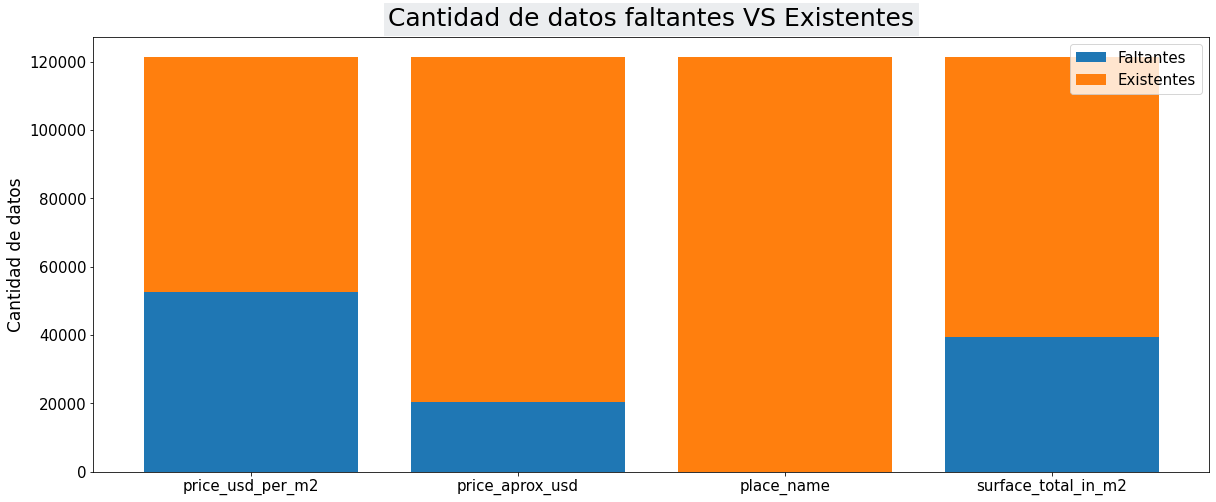

In [6]:
# Grafico de Barras que muestra el estado actual de faltantes para las variables mas importantes
grupos = ['price_usd_per_m2', 'price_aprox_usd', 'place_name', 'surface_total_in_m2']
faltantes = data[grupos].isna()
existentes = data[grupos].notna()

plt.figure(figsize=(20,8), edgecolor='blue')
plt.bar(grupos, faltantes.sum(), label='Faltantes')
plt.bar(grupos, existentes.sum(), label='Existentes', bottom = faltantes.sum())

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel("Cantidad de datos", fontsize = 17)
plt.xlabel("")
plt.title('Cantidad de datos faltantes VS Existentes', fontsize = 25, backgroundcolor = "#ebedef", pad='11.0')
plt.legend(fontsize = 15)


plt.show()

## **Limpieza de Datos**






### 1. Eliminacion de columnas que no aportan valor

In [7]:
# La primera columna 'Unnamed' es un indice pero como Pandas posee uno esta columna no aporta valor
# Se observa que la Columna 'operation' no aporta al tener un unico valor, "sell"
data.operation.value_counts()

sell    121220
Name: operation, dtype: int64

In [8]:
# La columna 'country_name' Tampoco aporta ya que todos los datos son de Argentina
data.country_name.value_counts()
# La Columna 'lat-lon' es una combinacion de las columnas 'lat' y 'lon' por lo que no seria necesaria
# La Columna 'properati_url' que corresponde al url del inmueble tampoco aporta estadisticamente al analisis de los datos
# asi como 'image_thumbnail'

Argentina    121220
Name: country_name, dtype: int64

In [9]:
# Con la siguiete funcion booleana se observa que las filas faltantes en lat-lot coinciden con las de lat y lon, por lo que seria un dato redundante
(data['lat-lon'].notna() & data.lat.notna() & data.lon.notna()).sum()

69670

In [10]:
# Se lista los nombres de las columnas para poder eliminar las columnas arriba mencionadas
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [11]:
# Despues de esa primera inspeccion se a dejara al DataFrame con un conjunto mas reducido de columnas
data_clean = data.drop(['Unnamed: 0','operation','country_name','lat-lon','properati_url','image_thumbnail'], axis=1)
# Se reduce el DataFrame a 20 columnas, antes se tenian 26
data_clean.shape

(121220, 20)

In [12]:
# Se valida como queda despues de eliminar las columnas anteriores
data_clean.sample(1)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
61366,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,3430234.0,-34.586804,-58.42083,180000.0,USD,3176010.0,180000.0,60.0,NaN,3000.0,NaN,NaN,3.0,NaN,"Venta de Departamento 3 AMBIENTES en Palermo, ...",DEPARTAMENTO EN VENTA


### 2. Identificacion de datos duplicados

In [13]:
# Se valida si hay duplicados para el juego mas represetativo de Columnas
data_clean.duplicated().sum()

5080

In [14]:
# Se limpia el DataFrame de los datos duplicados
data_clean = data_clean.drop_duplicates()
data_clean.shape

(116140, 20)

In [15]:
# Se imprime detalles de los tipos de datos de las columnas y datos no nulos estimados
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116140 entries, 0 to 121219
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   property_type               116140 non-null  object 
 1   place_name                  116117 non-null  object 
 2   place_with_parent_names     116140 non-null  object 
 3   state_name                  116140 non-null  object 
 4   geonames_id                 97960 non-null   float64
 5   lat                         67851 non-null   float64
 6   lon                         67851 non-null   float64
 7   price                       98584 non-null   float64
 8   currency                    98583 non-null   object 
 9   price_aprox_local_currency  98584 non-null   float64
 10  price_aprox_usd             98584 non-null   float64
 11  surface_total_in_m2         77762 non-null   float64
 12  surface_covered_in_m2       97287 non-null   float64
 13  price_usd_per_

## **Imputación de Datos**

### 1. Valores faltantes

In [16]:
# Se obtiene la cantidad de valores faltantes por columna
(data_clean.isna().sum()).round(2).sort_values()

property_type                      0
state_name                         0
title                              0
place_with_parent_names            0
description                        2
place_name                        23
price_aprox_usd                17556
price_aprox_local_currency     17556
price                          17556
currency                       17557
geonames_id                    18180
surface_covered_in_m2          18853
price_per_m2                   30443
surface_total_in_m2            38378
lon                            48289
lat                            48289
price_usd_per_m2               49289
rooms                          69941
expenses                      102055
floor                         108481
dtype: int64

In [17]:
# Se extrae el valor porcentual por columna de valores faltantes
(100*data_clean.isna().sum()/data_clean.index.size).round(2).sort_values()

property_type                  0.00
description                    0.00
state_name                     0.00
title                          0.00
place_with_parent_names        0.00
place_name                     0.02
price                         15.12
currency                      15.12
price_aprox_usd               15.12
price_aprox_local_currency    15.12
geonames_id                   15.65
surface_covered_in_m2         16.23
price_per_m2                  26.21
surface_total_in_m2           33.04
lat                           41.58
lon                           41.58
price_usd_per_m2              42.44
rooms                         60.22
expenses                      87.87
floor                         93.41
dtype: float64

### 2. Gestion de registros faltantes

In [18]:
# Con esta funcion Booleana se valida si las variable 'price_aprox_usd' 'price_aprox_local_currency' 'price', si los registros null coinciden para las tres en las mismas filas
(((data_clean.price_aprox_usd.notna()) | (data_clean.price_aprox_local_currency.notna()) | (data_clean.price.notna())) & ((data_clean.price_aprox_usd.isna()) | (data_clean.price_aprox_local_currency.isna()) | (data_clean.price.isna()))).sum()
# Cero indica que coinciden con las ubicaciones de sus datos faltantes

0

In [19]:
# Para validar si el Precio x Metro Cuadrado (price_usd_per_m2) se esta estimando de la variable 'surface_covered_in_m2' o si se esta tomando 
# 'surface_total_in_m2' se crea una nueva columna llamada 'Precio_usd_por_m2_estimado' donde se hace el calculo estimando. 
# el Precio en dolares por metro cuadrado utilizando tanto la variable 'surface_total_in_m2' y 'surface_covered_in_m2' y este resultado
# Se calcula lo comparamos con el valor de 'price_usd_per_m2' que nos proporcionan, para ver con cual de esas estimacione coincide mas

# data_clean['Precio_usd_por_m2_estimado']=data_clean.price_aprox_usd/data_clean.surface_covered_in_m2
data_clean['Precio_usd_por_m2_estimado'] = data_clean.price_aprox_usd / data_clean.surface_total_in_m2
# Esta resta da cero sòlo para 'surface_total_in_m2' lo que in dica que esa variable es la usada para la estimacion del precio en dolares por metro cuadrado
(data_clean.price_usd_per_m2 - data_clean.Precio_usd_por_m2_estimado).sum().round(4)

0.0

In [20]:
# Con la deduccion anterior se puede imputar algunos valores faltantes de 'price_usd_per_m2' con el calculo 'price_aprox_usd' / 'surface_tolal_in_m2'
data_clean.price_usd_per_m2.fillna(data_clean.price_aprox_usd / data_clean.surface_total_in_m2, inplace = True)
(data_clean.isna().sum()).round(2).sort_values()

property_type                      0
place_with_parent_names            0
state_name                         0
title                              0
description                        2
place_name                        23
price_aprox_local_currency     17556
price_aprox_usd                17556
price                          17556
currency                       17557
geonames_id                    18180
surface_covered_in_m2          18853
price_per_m2                   30443
surface_total_in_m2            38378
lon                            48289
lat                            48289
price_usd_per_m2               49040
Precio_usd_por_m2_estimado     49040
rooms                          69941
expenses                      102055
floor                         108481
dtype: int64

In [21]:
# Con esta operacion Booleana se puede estimar si se puede calcular el valor de una de estas tres variables inexistentes a partir del valor de cualquiera de otras dos existentes
(((data_clean.surface_total_in_m2.isna()) & (data_clean.price_aprox_usd.notna()) & (data_clean.price_usd_per_m2.notna()))
 | ((data_clean.surface_total_in_m2.notna()) & (data_clean.price_aprox_usd.isna()) & (data_clean.price_usd_per_m2.notna()))
 | ((data_clean.surface_total_in_m2.notna()) & (data_clean.price_aprox_usd.notna()) & (data_clean.price_usd_per_m2.isna()))).sum()
# No hay dos coincidencias simultaneas de dos variable para poder usarlas para estimas una tercera

0

### 3. Se completa la variable place_name

In [22]:
# Se observa que la variable 'place_name' tiene sólo 23 faltantes
mask_place_name_na = data_clean.place_name.isna()
mask_place_name_na.sum()

23

In [23]:
# Por ser tan pocos los faltantes se puden inspeccionar visualmente, esta inspeccion nos indica que todos estos faltates correspondes a 'Tigre'
data_clean[mask_place_name_na].loc[:,['place_name','place_with_parent_names']]

,place_name,place_with_parent_names
6489,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
10201,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
11451,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
14839,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
18622,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
21922,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
23664,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
24722,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
38856,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
45970,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||


In [24]:
# Se imputa con el valor 'Tigre' los faltantes de place_name 
data_clean.place_name.fillna('Tigre', inplace=True)
# Aqui ya se ve 'place_name' sin datos faltantes
data_clean.place_name.isna().sum()

0

### 4. Calculo de la tasa de cambio

In [25]:
# Se calcula la tasa de cambio dividiendo 'price_aprox_local_currency' / 'price_aprox_usd'
data_clean['cambio'] = data_clean.price_aprox_local_currency / data_clean.price_aprox_usd
# Para validar si la serie resultante es consistente y uniforme se compara el minimo y maximo de la misma
print(data_clean['cambio'].min())
print(data_clean['cambio'].max())
# Lo que da una tasa consistente en 17.6445, la cosistencia entre los maximos y minimos da a entender que son confiables
# Los datos de estas dos variables

17.644498249101435
17.6445


In [26]:
# Con la siguiente consulta se observa que el valor mas relevante de moneda corresponde al Dolar, por lo que los campos asociados a USD son los que se va a tratar de imputar 
data_clean.currency.value_counts()

USD    85919
ARS    12661
PEN        2
UYU        1
Name: currency, dtype: int64

In [27]:
# Se valida los datos no nulos para comparar la eliminacion de outliers
(data_clean.notna().sum()).sort_values()

floor                           7659
expenses                       14085
rooms                          46199
price_usd_per_m2               67100
Precio_usd_por_m2_estimado     67100
lat                            67851
lon                            67851
surface_total_in_m2            77762
price_per_m2                   85697
surface_covered_in_m2          97287
geonames_id                    97960
cambio                         98583
currency                       98583
price_aprox_usd                98584
price                          98584
price_aprox_local_currency     98584
description                   116138
state_name                    116140
place_with_parent_names       116140
place_name                    116140
title                         116140
property_type                 116140
dtype: int64

### 5. Detección de Outliers

In [28]:
# Se eliminan ouliers basados en zscore
# Primero se identifica los valores atipicos basado en 'place_name', 'property_type'
mask_1 = data_clean.groupby(["place_name","property_type"])['price_aprox_usd'].transform(lambda x: abs((x - x.mean())/x.std())>3)
data_clean['outlier_price_usd_per_m2'] = mask_1
data_clean[mask_1].loc[:,['place_name','place_with_parent_names', 'outlier_price_usd_per_m2']]

,place_name,place_with_parent_names,outlier_price_usd_per_m2
88,Córdoba,|Argentina|Córdoba|Córdoba|,True
90,Córdoba,|Argentina|Córdoba|Córdoba|,True
145,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,True
152,El Talar,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|El T...,True
173,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,True
...,...,...,...
119506,Glew,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,True
119574,Miramar,|Argentina|Buenos Aires Costa Atlántica|Miramar|,True
119849,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,True
119941,Acacias Blancas,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ac...,True


In [29]:
# Se dentifica el grupo Localidades/Tipo de propiedad ordenadas por cantidad de outliers 
data_clean.groupby(["place_name","property_type"]).outlier_price_usd_per_m2.sum().sort_values(ascending=False).head(20)

place_name       property_type
Córdoba          apartment        156
Rosario          apartment         83
Mar del Plata    apartment         68
Córdoba          house             54
Nordelta         apartment         46
Palermo          apartment         44
Belgrano         apartment         44
Tigre            house             35
Pilar            house             32
Recoleta         apartment         29
Tigre            apartment         27
La Plata         apartment         25
Morón            apartment         24
Almagro          apartment         24
Villa Urquiza    apartment         22
Lomas de Zamora  apartment         22
Escobar          house             21
Villa Crespo     apartment         21
Villa Ballester  apartment         20
Barrio Norte     apartment         19
Name: outlier_price_usd_per_m2, dtype: int64

#### 5.1 Visualización de Outliers

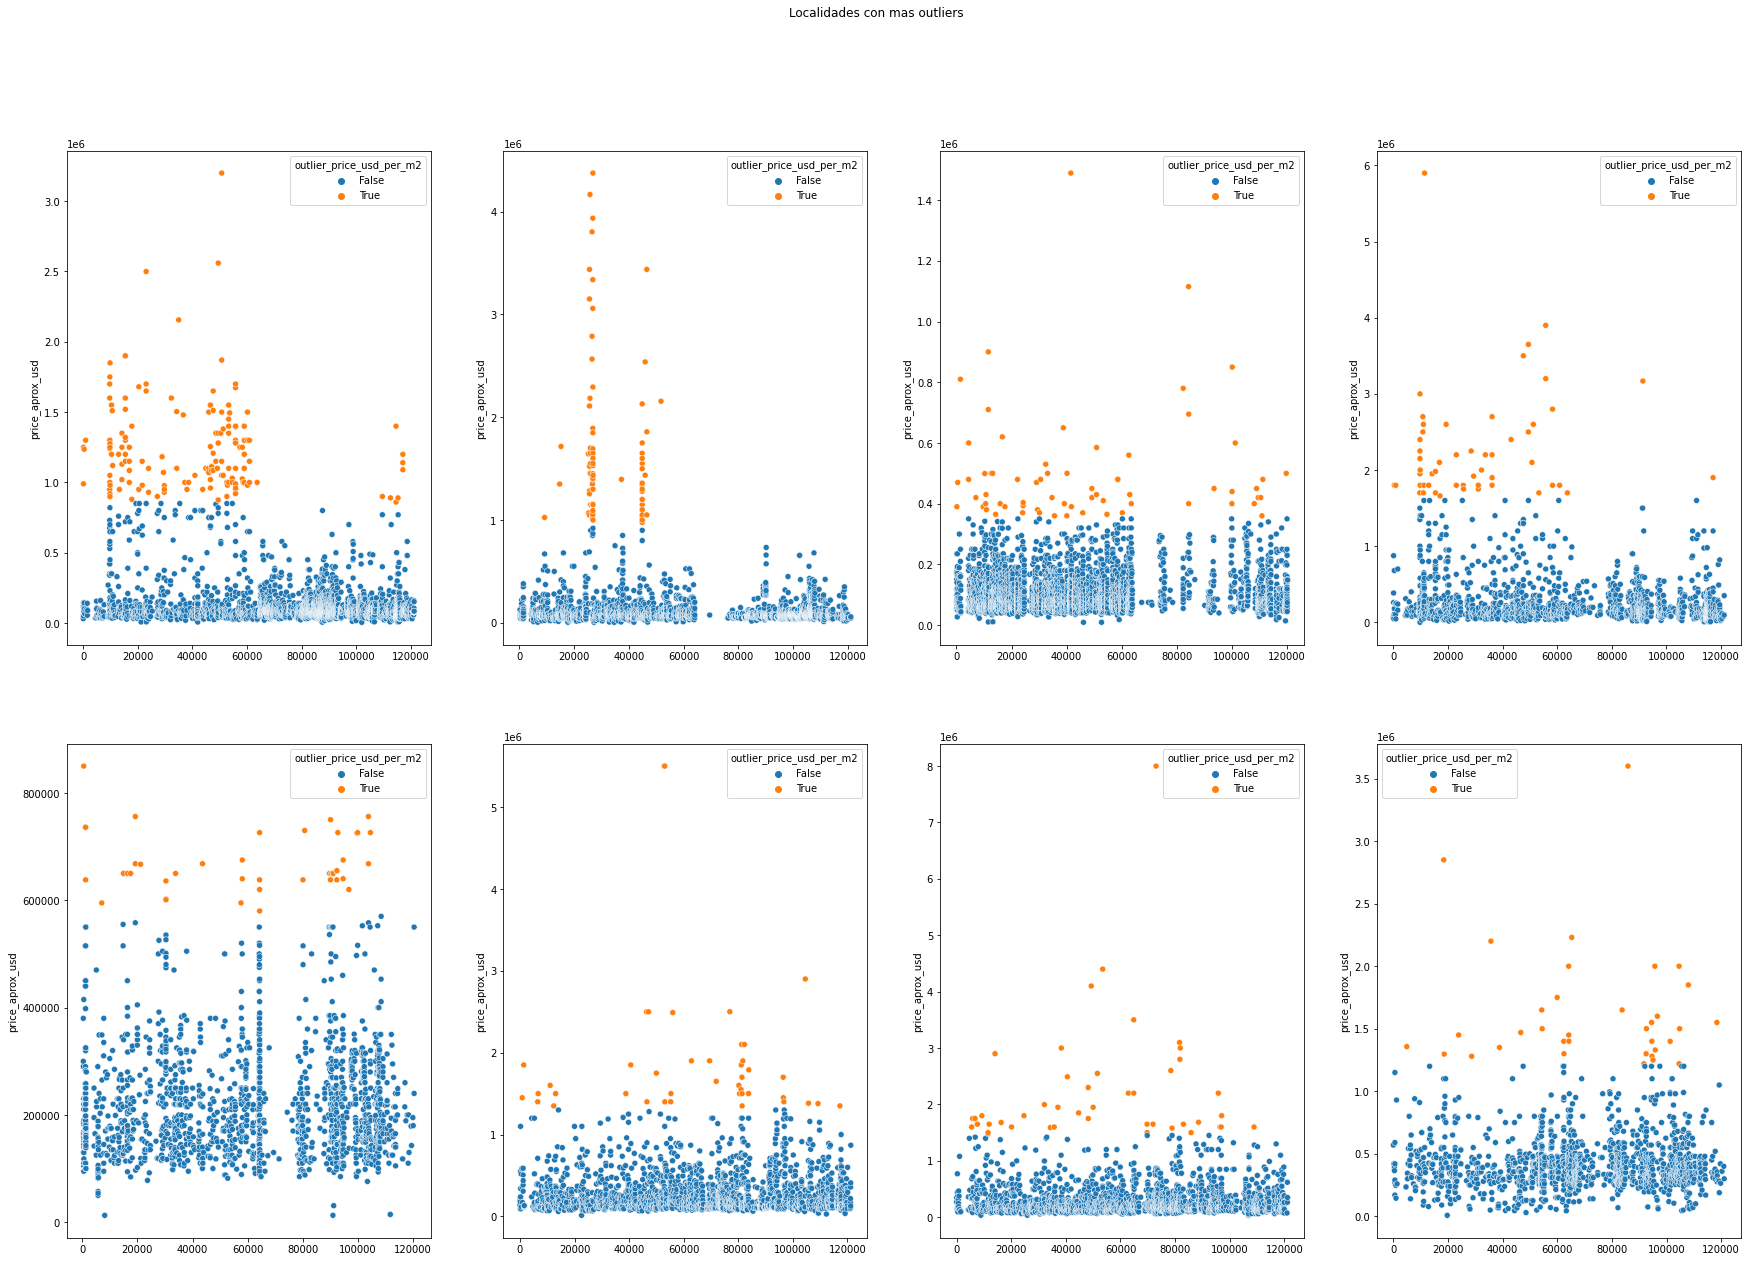

In [30]:
# Se realiza graficas de scatter de los grupos con mas outliers identificados para tener una imagen visual de estos

fig, axes = plt.subplots(2, 4, figsize=(30, 20))
fig.suptitle('Localidades con mas outliers')

mask_placeName = (data_clean['place_name']=='Córdoba') & (data_clean['property_type']=='apartment')
sns.scatterplot(ax=axes[0,0],data = data_clean[mask_placeName], x = data_clean[mask_placeName].index, y='price_aprox_usd', hue=data_clean[mask_placeName].outlier_price_usd_per_m2)

mask_placeName = (data_clean['place_name']=='Rosario') & (data_clean['property_type']=='apartment')
sns.scatterplot(ax=axes[0,1],data=data_clean[mask_placeName], x=data_clean[mask_placeName].index, y='price_aprox_usd', hue=data_clean[mask_placeName].outlier_price_usd_per_m2)

mask_placeName = (data_clean['place_name']=='Mar del Plata') & (data_clean['property_type']=='apartment')
sns.scatterplot(ax=axes[0,2],data=data_clean[mask_placeName], x=data_clean[mask_placeName].index, y='price_aprox_usd', hue=data_clean[mask_placeName].outlier_price_usd_per_m2)

mask_placeName = (data_clean['place_name']=='Córdoba') & (data_clean['property_type']=='house')
sns.scatterplot(ax=axes[0,3],data=data_clean[mask_placeName], x=data_clean[mask_placeName].index, y='price_aprox_usd', hue=data_clean[mask_placeName].outlier_price_usd_per_m2)

mask_placeName = (data_clean['place_name']=='Nordelta') & (data_clean['property_type']=='apartment')
sns.scatterplot(ax=axes[1,0],data=data_clean[mask_placeName], x=data_clean[mask_placeName].index, y='price_aprox_usd', hue=data_clean[mask_placeName].outlier_price_usd_per_m2)

mask_placeName = (data_clean['place_name']=='Belgrano') & (data_clean['property_type']=='apartment')
sns.scatterplot(ax=axes[1,1],data=data_clean[mask_placeName], x=data_clean[mask_placeName].index, y='price_aprox_usd', hue=data_clean[mask_placeName].outlier_price_usd_per_m2)

mask_placeName = (data_clean['place_name']=='Palermo') & (data_clean['property_type']=='apartment')
sns.scatterplot(ax=axes[1,2],data=data_clean[mask_placeName], x=data_clean[mask_placeName].index, y='price_aprox_usd', hue=data_clean[mask_placeName].outlier_price_usd_per_m2)

mask_placeName = (data_clean['place_name']=='Tigre') & (data_clean['property_type']=='house')
sns.scatterplot(ax=axes[1,3],data=data_clean[mask_placeName], x=data_clean[mask_placeName].index, y='price_aprox_usd', hue=data_clean[mask_placeName].outlier_price_usd_per_m2)

plt.show()

In [31]:
# Cantidad de datos atipicos
mask_1.sum()

1783

#### 5.2 DataFrame sin Outliers

In [32]:
# Se utiliza la mascara anterior para generar un nuevo DataFrame sin los valores atipicos(outliers)
data_clean = data_clean.loc[~mask_1,:]
(data_clean.notna().sum()).sort_values()

floor                           7451
expenses                       13883
rooms                          45236
Precio_usd_por_m2_estimado     65922
price_usd_per_m2               65922
lat                            66749
lon                            66749
surface_total_in_m2            76584
price_per_m2                   84119
surface_covered_in_m2          95709
geonames_id                    96431
cambio                         96800
currency                       96800
price_aprox_local_currency     96801
price_aprox_usd                96801
price                          96801
description                   114355
title                         114357
property_type                 114357
place_with_parent_names       114357
place_name                    114357
state_name                    114357
outlier_price_usd_per_m2      114357
dtype: int64

In [33]:
# Se valida nuevamente los registros faltantes por variable
(data_clean.isna().sum()).sort_values()

property_type                      0
title                              0
state_name                         0
outlier_price_usd_per_m2           0
place_name                         0
place_with_parent_names            0
description                        2
price                          17556
price_aprox_local_currency     17556
price_aprox_usd                17556
currency                       17557
cambio                         17557
geonames_id                    17926
surface_covered_in_m2          18648
price_per_m2                   30238
surface_total_in_m2            37773
lon                            47608
lat                            47608
Precio_usd_por_m2_estimado     48435
price_usd_per_m2               48435
rooms                          69121
expenses                      100474
floor                         106906
dtype: int64

In [34]:
# Se valida que ya no existan registros atipicos (outliers)
data_clean.loc[mask_1,'place_name'].value_counts().head(20)

Series([], Name: place_name, dtype: int64)

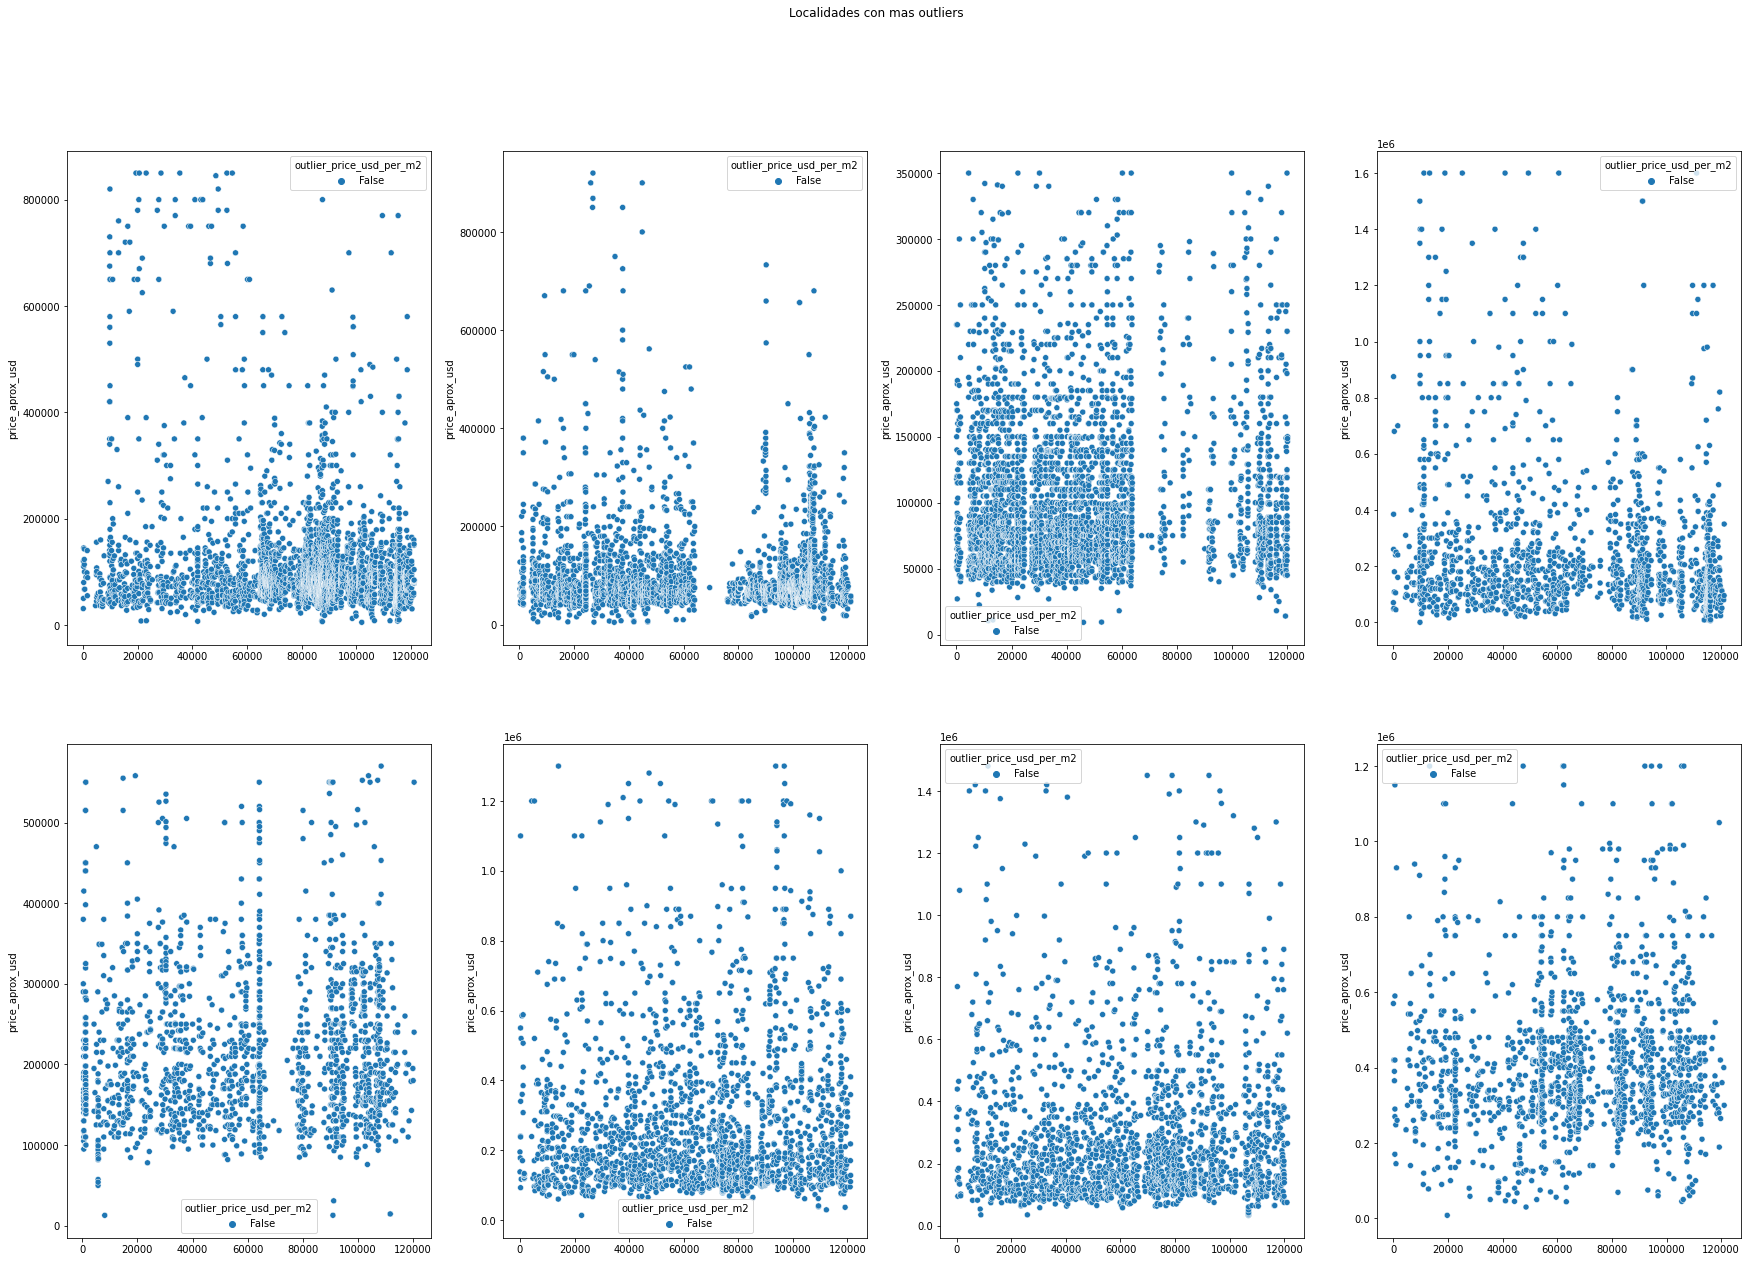

In [35]:
# Se realiza nuevamente la grafica de Scatter anterior para visualmente identificar la limpieza realiza de outliers
#data_clean['outlier_price_usd_per_m2']=mask_1

fig, axes = plt.subplots(2, 4, figsize=(30, 20))
fig.suptitle('Localidades con mas outliers')

mask_placeName=(data_clean['place_name']=='Córdoba') & (data_clean['property_type']=='apartment')
sns.scatterplot(ax=axes[0,0],data=data_clean[mask_placeName], x=data_clean[mask_placeName].index, y='price_aprox_usd', hue=data_clean[mask_placeName].outlier_price_usd_per_m2)

mask_placeName=(data_clean['place_name']=='Rosario') & (data_clean['property_type']=='apartment')
sns.scatterplot(ax=axes[0,1],data=data_clean[mask_placeName], x=data_clean[mask_placeName].index, y='price_aprox_usd', hue=data_clean[mask_placeName].outlier_price_usd_per_m2)

mask_placeName=(data_clean['place_name']=='Mar del Plata') & (data_clean['property_type']=='apartment')
sns.scatterplot(ax=axes[0,2],data=data_clean[mask_placeName], x=data_clean[mask_placeName].index, y='price_aprox_usd', hue=data_clean[mask_placeName].outlier_price_usd_per_m2)

mask_placeName=(data_clean['place_name']=='Córdoba') & (data_clean['property_type']=='house')
sns.scatterplot(ax=axes[0,3],data=data_clean[mask_placeName], x=data_clean[mask_placeName].index, y='price_aprox_usd', hue=data_clean[mask_placeName].outlier_price_usd_per_m2)

mask_placeName=(data_clean['place_name']=='Nordelta') & (data_clean['property_type']=='apartment')
sns.scatterplot(ax=axes[1,0],data=data_clean[mask_placeName], x=data_clean[mask_placeName].index, y='price_aprox_usd', hue=data_clean[mask_placeName].outlier_price_usd_per_m2)

mask_placeName=(data_clean['place_name']=='Belgrano') & (data_clean['property_type']=='apartment')
sns.scatterplot(ax=axes[1,1],data=data_clean[mask_placeName], x=data_clean[mask_placeName].index, y='price_aprox_usd', hue=data_clean[mask_placeName].outlier_price_usd_per_m2)

mask_placeName=(data_clean['place_name']=='Palermo') & (data_clean['property_type']=='apartment')
sns.scatterplot(ax=axes[1,2],data=data_clean[mask_placeName], x=data_clean[mask_placeName].index, y='price_aprox_usd', hue=data_clean[mask_placeName].outlier_price_usd_per_m2)

mask_placeName=(data_clean['place_name']=='Tigre') & (data_clean['property_type']=='house')
sns.scatterplot(ax=axes[1,3],data=data_clean[mask_placeName], x=data_clean[mask_placeName].index, y='price_aprox_usd', hue=data_clean[mask_placeName].outlier_price_usd_per_m2)

plt.show()

### 6. Imputación de 'price_aprox_usd'

In [36]:
# Se imputa 'price_aprox_usd' Utilizando como estrategia los promedios de 'price_aprox_usd' para el grupo "place_name","property_type"
data_clean.price_aprox_usd = data_clean.groupby(["place_name","property_type"])['price_aprox_usd'].apply(lambda x: x.fillna(x.mean()))

In [37]:
# Se observa que con la imputacion anterior ahora solo tenemos 464 registros con datos Nulos
(data_clean.isna().sum()).sort_values()

property_type                      0
title                              0
state_name                         0
outlier_price_usd_per_m2           0
place_name                         0
place_with_parent_names            0
description                        2
price_aprox_usd                  464
price                          17556
price_aprox_local_currency     17556
currency                       17557
cambio                         17557
geonames_id                    17926
surface_covered_in_m2          18648
price_per_m2                   30238
surface_total_in_m2            37773
lon                            47608
lat                            47608
Precio_usd_por_m2_estimado     48435
price_usd_per_m2               48435
rooms                          69121
expenses                      100474
floor                         106906
dtype: int64

### 7. Imputación de 'price_usd_per_m2'

In [38]:
# Se imputa 'price_usd_per_m2' Utilizando como estrategia los promedios de 'price_usd_per_m2' para el grupo "place_name","property_type"
data_clean.price_usd_per_m2 = data_clean.groupby(["place_name","property_type"])['price_usd_per_m2'].apply(lambda x: x.fillna(x.mean()))

In [39]:
# Se observa que con la imputacion anterior ahora solo tenemos 2007 registros con datos Nulos
(data_clean.isna().sum()).sort_values()

property_type                      0
title                              0
state_name                         0
outlier_price_usd_per_m2           0
place_name                         0
place_with_parent_names            0
description                        2
price_aprox_usd                  464
price_usd_per_m2                2007
price                          17556
price_aprox_local_currency     17556
currency                       17557
cambio                         17557
geonames_id                    17926
surface_covered_in_m2          18648
price_per_m2                   30238
surface_total_in_m2            37773
lon                            47608
lat                            47608
Precio_usd_por_m2_estimado     48435
rooms                          69121
expenses                      100474
floor                         106906
dtype: int64

### 8. Imputacion 'surface_total_in_m2'

In [40]:
# Con esta operacion Booleana se estima si se puede calcular el valor de una de estas tres variables inexistentes a partir del valor de cualquiera de otras dos existentes
(((data_clean.surface_total_in_m2.isna()) & (data_clean.price_aprox_usd.notna()) & (data_clean.price_usd_per_m2.notna()))
 | ((data_clean.surface_total_in_m2.notna()) & (data_clean.price_aprox_usd.isna()) & (data_clean.price_usd_per_m2.notna()))
 | ((data_clean.surface_total_in_m2.notna()) & (data_clean.price_aprox_usd.notna()) & (data_clean.price_usd_per_m2.isna()))).sum()

36731

In [41]:
# Se visualiza la cantidad de valores nulos por variable en este punto
(data_clean.isna().sum()).sort_values()

property_type                      0
title                              0
state_name                         0
outlier_price_usd_per_m2           0
place_name                         0
place_with_parent_names            0
description                        2
price_aprox_usd                  464
price_usd_per_m2                2007
price                          17556
price_aprox_local_currency     17556
currency                       17557
cambio                         17557
geonames_id                    17926
surface_covered_in_m2          18648
price_per_m2                   30238
surface_total_in_m2            37773
lon                            47608
lat                            47608
Precio_usd_por_m2_estimado     48435
rooms                          69121
expenses                      100474
floor                         106906
dtype: int64

In [42]:
# La consulta anterior indica que se puede imputar nuevos valores para las columnas 'surface_total_in_m2' 'price_aprox_usd' price_usd_per_m2
# Por lo que se itera nuevamente una imputacion anterior
data_clean.price_usd_per_m2.fillna(data_clean.price_aprox_usd / data_clean.surface_total_in_m2, inplace=True)
data_clean.price_usd_per_m2.isna().sum()
# Lo que da un cantidad significativa de imputaciones de la variable price_usd_per_m2

1638

In [43]:
# Se vuelve a inspeccionar faltantes por variable
(data_clean.isna().sum()).sort_values()

property_type                      0
title                              0
state_name                         0
outlier_price_usd_per_m2           0
place_name                         0
place_with_parent_names            0
description                        2
price_aprox_usd                  464
price_usd_per_m2                1638
price                          17556
price_aprox_local_currency     17556
currency                       17557
cambio                         17557
geonames_id                    17926
surface_covered_in_m2          18648
price_per_m2                   30238
surface_total_in_m2            37773
lon                            47608
lat                            47608
Precio_usd_por_m2_estimado     48435
rooms                          69121
expenses                      100474
floor                         106906
dtype: int64

In [44]:
# Ahora se imputa 'surface_total_in_m2' y se obtiene una reduccion significativa de los datos faltantes
data_clean.surface_total_in_m2.fillna(data_clean.price_aprox_usd / data_clean.price_usd_per_m2, inplace=True )
data_clean.surface_total_in_m2.isna().sum()

1411

In [45]:
# Se verifica nuevamente la funcion Booleana la cual no arroja mas imputaciones posibles
(((data_clean.surface_total_in_m2.isna()) & (data_clean.price_aprox_usd.notna()) & (data_clean.price_usd_per_m2.notna()))
 | ((data_clean.surface_total_in_m2.notna()) & (data_clean.price_aprox_usd.isna()) & (data_clean.price_usd_per_m2.notna()))
 | ((data_clean.surface_total_in_m2.notna()) & (data_clean.price_aprox_usd.notna()) & (data_clean.price_usd_per_m2.isna()))).sum()

0

## **Resultados**

In [46]:
# Se valida que porcentanjes de datos invalidos se tienen es este punto
((100*(data_clean.isna().sum()))/data_clean.index.size).round(2).sort_values()

property_type                  0.00
title                          0.00
description                    0.00
outlier_price_usd_per_m2       0.00
place_name                     0.00
place_with_parent_names        0.00
state_name                     0.00
price_aprox_usd                0.41
surface_total_in_m2            1.23
price_usd_per_m2               1.43
currency                      15.35
cambio                        15.35
price                         15.35
price_aprox_local_currency    15.35
geonames_id                   15.68
surface_covered_in_m2         16.31
price_per_m2                  26.44
lon                           41.63
lat                           41.63
Precio_usd_por_m2_estimado    42.35
rooms                         60.44
expenses                      87.86
floor                         93.48
dtype: float64

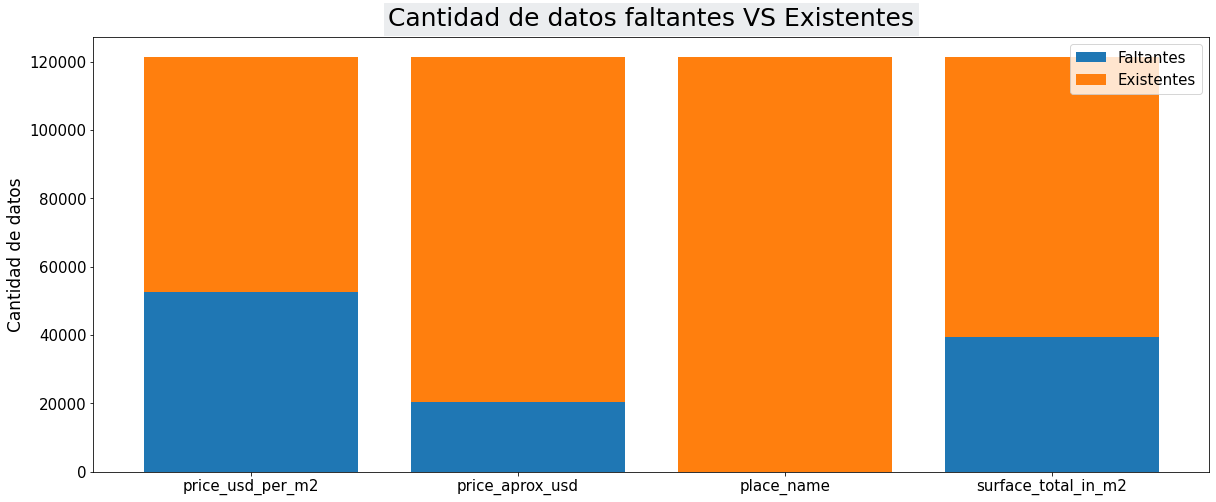

In [47]:
#El grafico de barras pretende mostrar el estado del dataframe Original VS ....
grupos = ['price_usd_per_m2', 'price_aprox_usd', 'place_name', 'surface_total_in_m2']
faltantes = data[grupos].isna()
existentes = data[grupos].notna()

plt.figure(figsize = (20,8),edgecolor = 'blue')
plt.bar(grupos, faltantes.sum(),label = 'Faltantes')
plt.bar(grupos, existentes.sum(),label = 'Existentes', bottom = faltantes.sum())

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel("Cantidad de datos", fontsize = 17)
plt.xlabel("")
plt.title('Cantidad de datos faltantes VS Existentes', fontsize = 25, backgroundcolor = "#ebedef", pad = '11.0')
plt.legend(fontsize = 15)
 
plt.show()

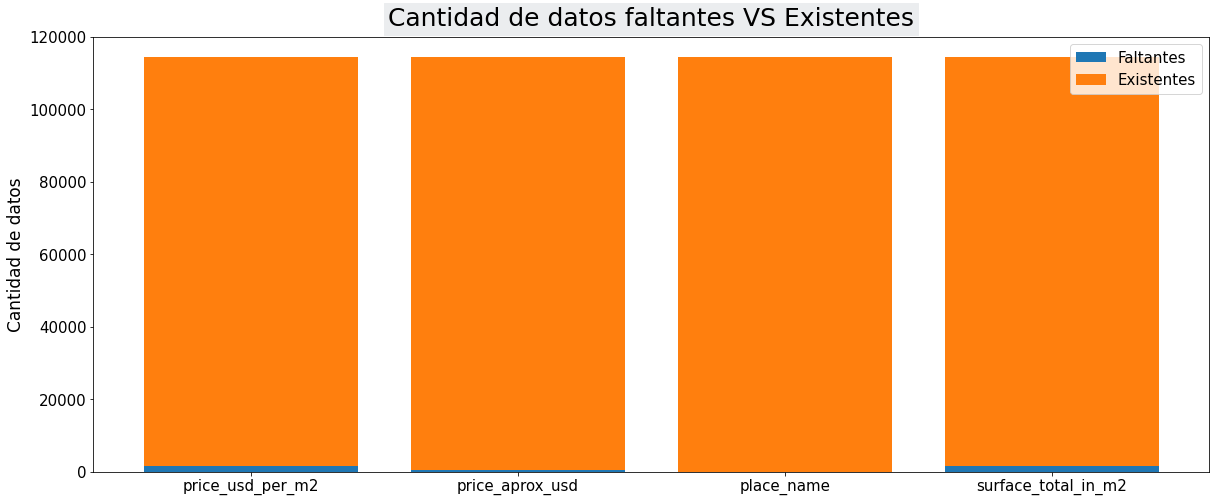

In [48]:
# El grafico después de las imputaciones
grupos = ['price_usd_per_m2', 'price_aprox_usd', 'place_name', 'surface_total_in_m2']
faltantes = data_clean[grupos].isna()
existentes = data_clean[grupos].notna()

plt.figure(figsize=(20,8),edgecolor = 'blue')
plt.bar(grupos, faltantes.sum(),label = 'Faltantes')
plt.bar(grupos, existentes.sum(),label = 'Existentes', bottom = faltantes.sum())

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel("Cantidad de datos", fontsize = 17)
plt.xlabel("")
plt.title('Cantidad de datos faltantes VS Existentes', fontsize = 25, backgroundcolor = "#ebedef", pad = '11.0')
plt.legend(fontsize = 15)
 
plt.show()

In [49]:
# Se logro un porcentaje bastante bajo de datos invalidos para la columna 'price_aprox_usd' por lo que se elimina los NaN
data_clean.dropna(subset = ['price_usd_per_m2'], inplace=True)
data_clean.sample(2)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title,Precio_usd_por_m2_estimado,cambio,outlier_price_usd_per_m2
11223,house,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,3430234.0,NaN,NaN,500000.0,USD,8822250.0,...,2369.668246,NaN,NaN,NaN,NaN,"TERRENO Propio de 211M2 Frente 8,70 por 24,20 ...",CASA EN PLENO PALERMO SOHO 2 UNIDADES EN BLOCK...,2369.668246,17.6445,False
72905,house,Luján,|Argentina|Buenos Aires Interior|Luján|,Buenos Aires Interior,3430982.0,NaN,NaN,320000.0,USD,5646240.0,...,969.199606,1142.857143,NaN,NaN,4100.0,La propiedad cuenta con tres dormitorios (uno ...,Casa - Los Puentes,NaN,17.6445,False


In [50]:
# Se valida que porcentajes de datos invalidos hay es este punto
((100*(data_clean.isna().sum()))/data_clean.index.size).round(2).sort_values()

property_type                  0.00
title                          0.00
description                    0.00
price_usd_per_m2               0.00
price_aprox_usd                0.00
surface_total_in_m2            0.00
outlier_price_usd_per_m2       0.00
state_name                     0.00
place_name                     0.00
place_with_parent_names        0.00
price                         14.87
currency                      14.87
price_aprox_local_currency    14.87
cambio                        14.87
geonames_id                   15.56
surface_covered_in_m2         15.96
price_per_m2                  25.92
Precio_usd_por_m2_estimado    41.52
lat                           41.64
lon                           41.64
rooms                         60.56
expenses                      87.70
floor                         93.44
dtype: float64

In [51]:
# Se elimina algunas columnas que fueron agregadas temporalmente para la limpieza
data_clean.drop(['Precio_usd_por_m2_estimado','outlier_price_usd_per_m2'], axis=1, inplace=True)

In [52]:
# Estado final del DataFrame
final_shape = data_clean.shape
final_shape

(112719, 21)

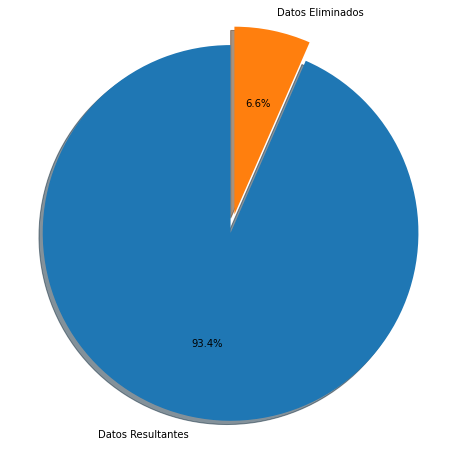

In [53]:
# Grafica de pie con el porcentaje de variacion de las filas del DataFrame con respecto al original
labels = 'Datos Resultantes','Datos Eliminados'
sizes = [initial_shape[0], initial_shape[0] - final_shape[0]]

explode = (0.1,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize = (8, 8))
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow=True, startangle = 90)
ax1.axis('equal') 

plt.show()

In [54]:
print(f' Total Filas Eliminadas: {initial_shape[0]-final_shape[0]} que equivalen al {round(100*(initial_shape[0]-final_shape[0])/(initial_shape[0]),2)} % ')
print(f' Total Columnas Eliminadas: {initial_shape[1]-final_shape[1]} que equivalen al {round(100*(initial_shape[1]-final_shape[1])/(initial_shape[1]),2)} % ')

 Total Filas Eliminadas: 8501 que equivalen al 7.01 % 
 Total Columnas Eliminadas: 5 que equivalen al 19.23 % 


In [55]:
# Exportación de este DataFrame más limpio a un nuevo archivo externo
data_clean.to_csv('/content/drive/MyDrive/Colab Notebooks/Precios de Propiedad - Análisis Exploratorio /inmobiliaria_properati_clean.csv')